In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")

import logging
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from xlstm_scaling_laws.common.load_data import load_run_data, load_run_summary_table
from xlstm_scaling_laws.common.wandb_run_data import download_wandb_run_data_per_tag
from xlstm_scaling_laws.load_data import create_isoflop_data_table
from xlstm_scaling_laws.load_data.isoflop import add_isoflop_columns
from xlstm_scaling_laws.run_data import RunData

In [2]:
logging.basicConfig(level=logging.WARNING, format="%(levelname)s: %(message)s")

# Babysitting IsoFLOP runs

In this notebook we show how we can visualize raw data for checking intermediate results of IsoFLOP experiments. 

In [13]:
sel_cols = [
    "IsoFLOP",
    "global_batch_size",
    "val/.dclm_loss",
    "learning_rate",
    "num_train_steps",
    "num_lr_warmup_steps",
    "num_flops_training",
    # "run_tag",
    "num_params_calculated",
    "Preset Num Params",
    "num_blocks",
    "num_heads",
    "embedding_dim",
]

In [6]:
isoflop_raw_run_data_df = create_isoflop_data_table()

In [7]:
isoflop_raw_run_data_df[sel_cols]

,IsoFLOP,global_batch_size,val/.dclm_loss,learning_rate,num_train_steps,num_lr_warmup_steps,num_flops_training,num_params_calculated,Preset Num Params,num_blocks,num_heads,embedding_dim
0,6e+18,128.0,3.214503,0.0030,11500.0,750.0,6.028081e+18,1.140347e+08,<130M,10,5,640
1,1e+19,128.0,3.173654,0.0030,19000.0,750.0,9.959438e+18,1.140347e+08,<130M,10,5,640
2,3e+19,128.0,3.114338,0.0030,57500.0,750.0,3.014040e+19,1.140347e+08,<130M,10,5,640
3,1e+20,128.0,3.080613,0.0030,192000.0,750.0,1.006427e+20,1.140347e+08,<130M,10,5,640
4,6e+18,128.0,3.175609,0.0030,9500.0,750.0,5.896365e+18,1.289281e+08,<130M,13,5,640
...,...,...,...,...,...,...,...,...,...,...,...,...
240,6e+20,256.0,2.521995,0.0009,9600.0,750.0,6.047212e+20,5.130622e+09,<1.4B,36,13,3328
241,6e+20,256.0,2.519549,0.0009,10600.0,750.0,5.960037e+20,4.597756e+09,<1.4B,32,13,3328
242,6e+20,256.0,2.507165,0.0009,11200.0,750.0,6.053234e+20,4.410155e+09,<1.4B,36,12,3072
243,extra,NaN,NaN,0.0009,NaN,NaN,NaN,5.311320e+09,<1.4B,32,14,3584


In [8]:
# filer diverging runs
isoflop_df = isoflop_raw_run_data_df[isoflop_raw_run_data_df["val/.dclm_loss"] < 4.0]
isoflop_df

,name,run_tag,model_type,global_batch_size,learning_rate,context_length,num_params,num_params_calculated,num_train_steps,num_lr_warmup_steps,...,proj_factor_ffn,num_heads,proj_factor_qk,chunk_size,vocab_size,ffn_multiple_of,status,IsoFLOP,Preset Token Param Ratio,Preset Num Params
0,dclm_mLSTMv1_100M_ctx8192_lr0.003_steps11500_n...,"nb10_ed640_nh5_pf2.667,sclaw_iso",mlstm_v1,128.0,0.0030,8192,1.140347e+08,1.140347e+08,11500.0,750.0,...,2.667,5,0.5,64,50304,64,finished,6e+18,110,<130M
1,dclm_mLSTMv1_100M_ctx8192_lr0.003_steps19000_n...,"nb10_ed640_nh5_pf2.667,sclaw_iso",mlstm_v1,128.0,0.0030,8192,1.140347e+08,1.140347e+08,19000.0,750.0,...,2.667,5,0.5,64,50304,64,finished,1e+19,extra,<130M
2,dclm_mLSTMv1_100M_ctx8192_lr0.003_steps57500_n...,"nb10_ed640_nh5_pf2.667,sclaw_iso",mlstm_v1,128.0,0.0030,8192,1.140347e+08,1.140347e+08,57500.0,750.0,...,2.667,5,0.5,64,50304,64,finished,3e+19,550,<130M
3,dclm_mLSTMv1_100M_ctx8192_lr0.003_steps192000_...,"nb10_ed640_nh5_pf2.667,sclaw_iso",mlstm_v1,128.0,0.0030,8192,1.140347e+08,1.140347e+08,192000.0,750.0,...,2.667,5,0.5,64,50304,64,finished,1e+20,extra,<130M
4,dclm_mLSTMv1_100M_ctx8192_lr0.003_steps9500_nb...,"nb13_ed640_nh5_pf2.667,sclaw_iso",mlstm_v1,128.0,0.0030,8192,1.289281e+08,1.289281e+08,9500.0,750.0,...,2.667,5,0.5,64,50304,64,finished,6e+18,extra,<130M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,dclm_mLSTMv1_5.5B_ctx8192_lr0.0009_steps8200_n...,sclaw_iso_round8,mlstm_v1,256.0,0.0009,8192,5.930163e+09,5.930163e+09,8200.0,750.0,...,2.667,14,0.5,64,50304,64,finished,6e+20,extra,<1.4B
239,dclm_mLSTMv1_5.5B_ctx8192_lr0.0009_steps9200_n...,sclaw_iso_round8,mlstm_v1,256.0,0.0009,8192,5.311320e+09,5.311320e+09,9200.0,750.0,...,2.667,14,0.5,64,50304,64,finished,6e+20,extra,<1.4B
240,dclm_mLSTMv1_4.5B_ctx8192_lr0.0009_steps9600_n...,sclaw_iso_round8,mlstm_v1,256.0,0.0009,8192,5.130622e+09,5.130622e+09,9600.0,750.0,...,2.667,13,0.5,64,50304,64,finished,6e+20,extra,<1.4B
241,dclm_mLSTMv1_4.5B_ctx8192_lr0.0009_steps10600_...,sclaw_iso_round8,mlstm_v1,256.0,0.0009,8192,4.597756e+09,4.597756e+09,10600.0,750.0,...,2.667,13,0.5,64,50304,64,finished,6e+20,extra,<1.4B


In [9]:
# filter runs with num_flops_training < 3e20 and global_batch_size < 200
isoflop_df = isoflop_df.loc[
    (
        (isoflop_df["num_flops_training"] < 3e20)
        & (isoflop_df["global_batch_size"] < 200.0)
    )
    | (isoflop_df["num_flops_training"] > 3e20)
]

(100000000.0, 10000000000.0)

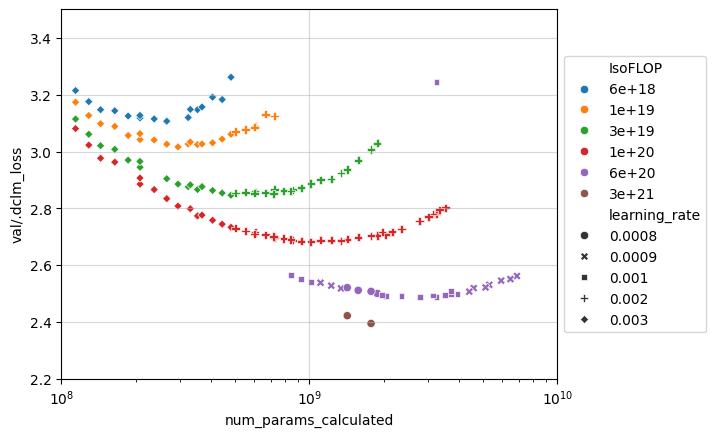

In [10]:
ax = sns.scatterplot(
    data=isoflop_df,
    x="num_params_calculated",
    y="val/.dclm_loss",
    hue="IsoFLOP",
    style="learning_rate",
    markers=True,
    # palette=sns.color_palette(
    #     "rocket_r", n_colors=len(data_df["Model Size"].unique())
    # ), #sns.color_palette("deep"),
)
# ax = sns.scatterplot(
#         data=iso_round7_df,
#         x="num_params_calculated",
#         y="val/.dclm_loss",
#         hue="IsoFLOP",
#         style="learning_rate",
#         markers=True,
#         # palette=sns.color_palette(
#         #     "rocket_r", n_colors=len(data_df["Model Size"].unique())
#         # ), #sns.color_palette("deep"),
#         ax=ax,
#     )
ax.set_xscale("log")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.grid(alpha=0.5)
ax.set_ylim(2.2, 3.5)
ax.set_xlim(1e8, 1e10)

In [11]:
isoflop_df[sel_cols][isoflop_df["IsoFLOP"] == "3e+19"]

,IsoFLOP,global_batch_size,val/.dclm_loss,learning_rate,num_train_steps,num_lr_warmup_steps,num_flops_training,num_params_calculated,Preset Num Params,num_blocks,num_heads,embedding_dim
2,3e+19,128.0,3.114338,0.003,57500.0,750.0,3.014040e+19,1.140347e+08,<130M,10,5,640
6,3e+19,128.0,3.060769,0.003,48500.0,750.0,3.010250e+19,1.289281e+08,<130M,13,5,640
10,3e+19,128.0,3.020483,0.003,42000.0,750.0,3.012068e+19,1.438216e+08,<180M,16,5,640
14,3e+19,128.0,3.007714,0.003,38000.0,750.0,3.050676e+19,1.641102e+08,<180M,12,6,768
18,3e+19,128.0,2.969809,0.003,32500.0,750.0,3.063926e+19,1.858209e+08,<240M,15,6,768
21,3e+19,128.0,2.944856,0.003,28000.0,750.0,3.031514e+19,2.075315e+08,<240M,18,6,768
25,3e+19,128.0,2.863033,0.003,13000.0,750.0,2.978354e+19,4.068569e+08,<440M,24,4,1024
29,3e+19,128.0,2.854075,0.003,12000.0,750.0,3.044294e+19,4.448361e+08,<700M,27,4,1024
33,3e+19,128.0,2.846410,0.003,11000.0,750.0,3.061060e+19,4.828152e+08,<700M,30,4,1024
36,3e+19,128.0,2.858519,0.002,8500.0,750.0,2.949752e+19,6.049705e+08,<700M,24,5,1280


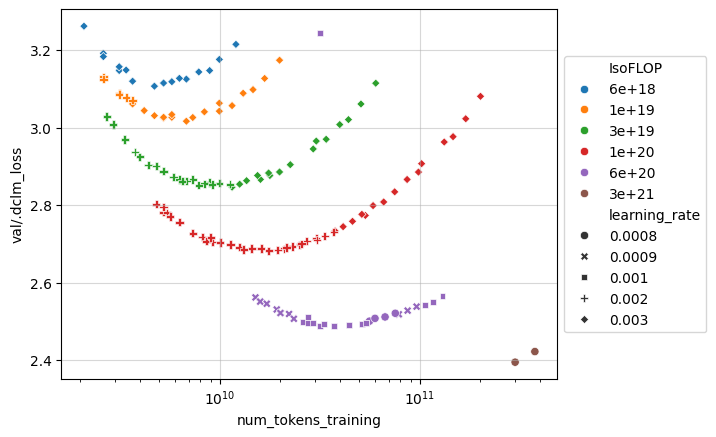

In [12]:
ax = sns.scatterplot(
    data=isoflop_df,
    x="num_tokens_training",
    y="val/.dclm_loss",
    hue="IsoFLOP",
    style="learning_rate",  # "Preset Num Params",
    markers=True,
    # palette=sns.color_palette(
    #     "rocket_r", n_colors=len(data_df["Model Size"].unique())
    # ), #sns.color_palette("deep"),
)
# ax = sns.scatterplot(
#         data=iso_round7_df,
#         x="num_tokens_training",
#         y="val/.dclm_loss",
#         hue="IsoFLOP",
#         style="learning_rate", #"Preset Num Params",
#         markers=True,
#         # palette=sns.color_palette(
#         #     "rocket_r", n_colors=len(data_df["Model Size"].unique())
#         # ), #sns.color_palette("deep"),
#         ax=ax,
#     )
ax.set_xscale("log")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.grid(alpha=0.5)